In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [24]:
reviews = pd.read_csv('dataset/deathmetal/reviews.csv')
bands = pd.read_csv('dataset/deathmetal/bands.csv')
albums = pd.read_csv('dataset/deathmetal/albums.csv')

In [25]:
reviews.head()

,id,album,title,score,content
0,1,4,The Killer Count Just Keeps Rising,0.88,When I first threw this on I really didnt know...
1,2,5,A gem of heterogeneous death metal...,0.96,Several years ago I bought from a band member|...
2,3,8,Fantasic| if mostly for its influences,0.83,What a wonderful release this is. ‘Vox Fatum’ ...
3,4,45,A rare| lost hidden gem,0.80,Picture this: crushing| brutal death metal| wi...
4,5,54,Pure| but flayed and covered in soot,0.92,Abhordium's When Depravity Incarnates is an ex...


In [26]:
bands.head()

,id,name,country,status,formed_in,genre,theme,active
0,1,('M') Inc.,United States,Unknown,2009.0,Death Metal,NaN,2009-?
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-present
3,4,100 Suns,United States,Active,2004.0,Death Metal,NaN,2004-present
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002


In [27]:
albums.head()

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002


In [28]:
tick_font_dict = {'fontsize' : 15}
label_font_dict = {"fontsize" : 20}
title_font_dict = {'fontsize': 30}

In [29]:
print (f'First time death-metal band formed in: {bands["formed_in"].min()}\nName: {bands.loc[bands.formed_in == 1977, "name"].values[0]}')

First time death-metal band formed in: 1977.0
Name: Satan's Host


In [30]:
print ('Albums created by "Satan\'s host": ')
print('\t' + '\n\t'.join(albums.merge(bands, left_on = 'band', right_on = 'id').query("formed_in == 1977")['title'].values))

Albums created by "Satan's host": 
	Metal from Hell
	Archidoxes of Evil
	Burning the Born Again... (A New Philosophy)
	Satanic Grimoire: A Greater Black Magick
	Great American Scapegoat 666
	Power ~ Purity ~ Perfection...999
	By the Hands of the Devil
	Virgin Sails
	Pre-dating God Part 1
	Pre-dating God Part 2


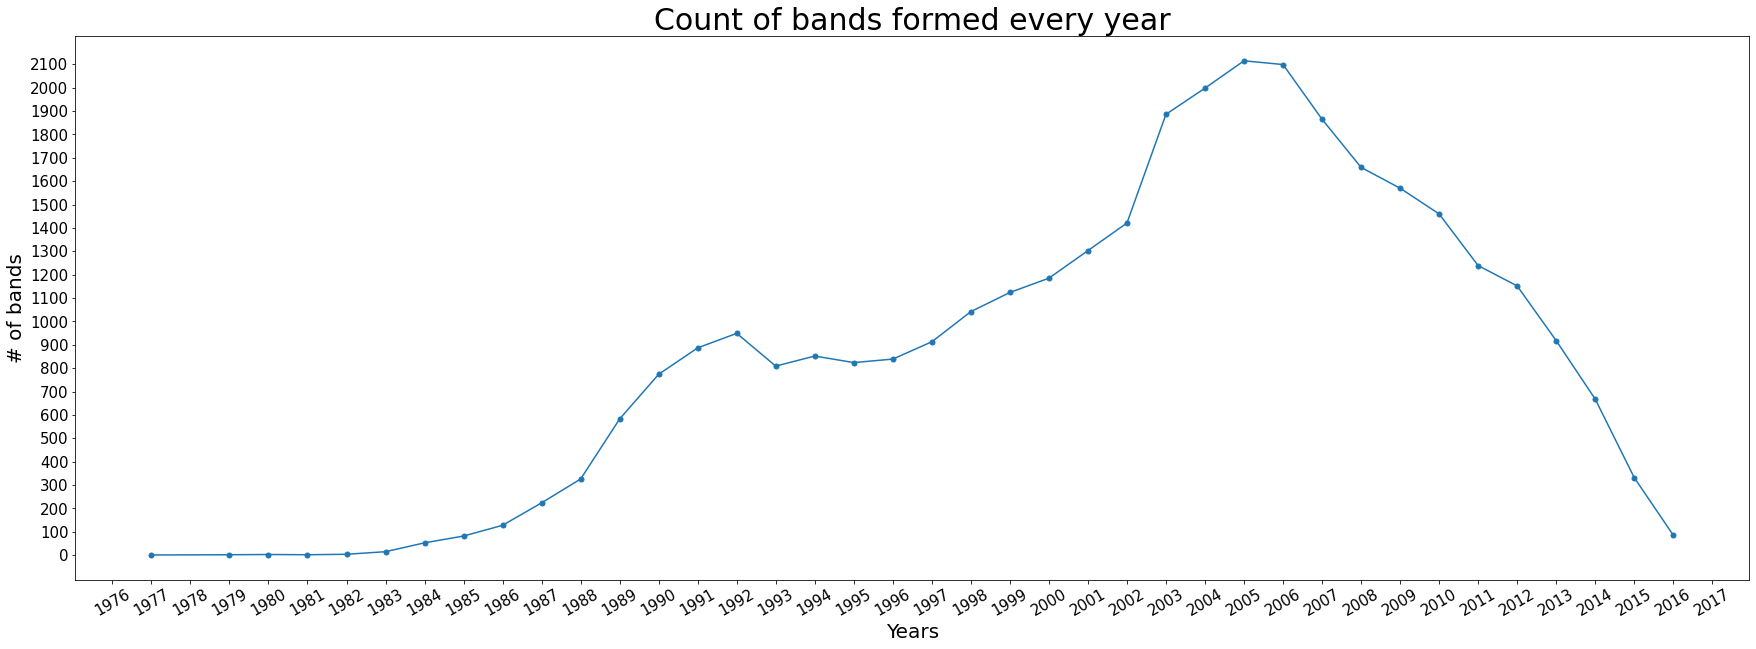

In [32]:
ax = bands.groupby('formed_in')['id'].count().plot(rot = 30, marker = 'o', markersize = 5, figsize = (30, 10))
ax.set_xlabel('Years', fontdict = label_font_dict)
ax.set_ylabel('# of bands', fontdict = label_font_dict)
_ = ax.set_xticks(range(1976, 2018))#fontdict
_ = ax.set_xticklabels(range(1976, 2018), fontdict = tick_font_dict)
_ = ax.set_yticks(range(0, 2200, 100))
_ = ax.set_yticklabels(range(0, 2200, 100), fontdict = tick_font_dict)
_ = ax.set_title("Count of bands formed every year", fontdict = title_font_dict)

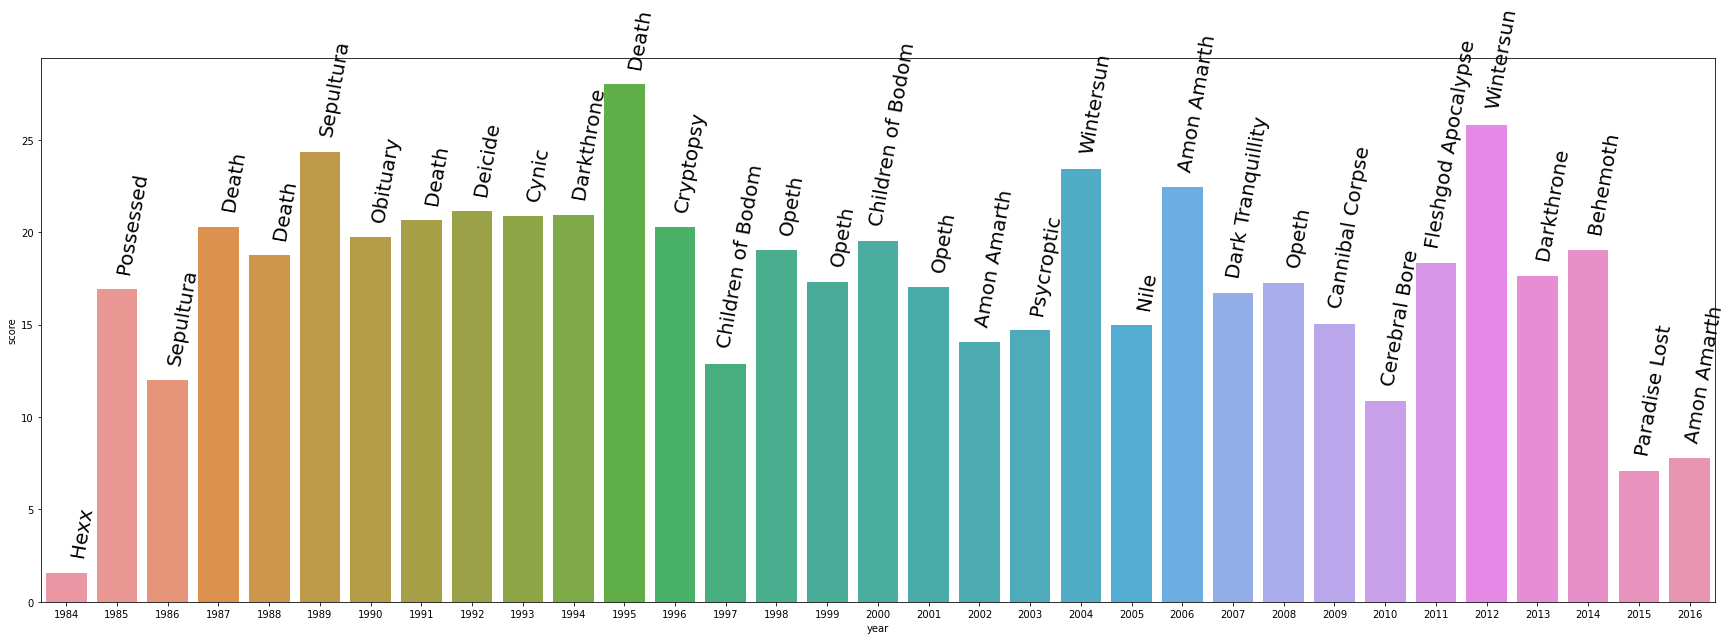

In [33]:
band_names = bands.loc[:, ['id', 'name']]
album_band_names = albums.merge(band_names, left_on = 'band', right_on = 'id').loc[:, ['id_x', 'name', 'year']]
review_album_name = reviews.merge(album_band_names, left_on = 'album', right_on = 'id_x')
reviews_overtime = review_album_name.groupby(['year', 'name']).agg({'score': 'sum'}).reset_index()
index = reviews_overtime.groupby('year').agg({'score': 'idxmax'})
filtered_bands = reviews_overtime.loc[index.loc[:,'score'].values]

plt.figure(figsize=(30, 10))
bar = sns.barplot(x = filtered_bands.loc[:, 'year'], y = filtered_bands.loc[:, 'score'])
for p, name in zip(bar.patches, filtered_bands.loc[:, 'name']):
        _x = p.get_x() + p.get_width() - 0.1
        _y = p.get_y() + p.get_height() + 1
        value = name
        bar.text(_x, _y, value, ha="center", rotation = 80, fontdict = {"fontsize": 20})

In [34]:
country_wise = bands.groupby('country').agg({'country': {'count'}}).reset_index()
country_wise.columns = ['_'.join(col) for col in country_wise.columns]
top5_country = country_wise.sort_values('country_count', ascending = False).iloc[:10]
print ("Top 10 country of highest bands formation: ")
print ("{:<30} {}".format('Country name', '# of bands'))
for country, count in top5_country.values:
    print ('{:<30} {}'.format(country, count))

Top 10 country of highest bands formation: 
Country name                   # of bands
United States                  7899
Germany                        3318
Italy                          1625
Brazil                         1592
Sweden                         1578
France                         1482
United Kingdom                 1342
Poland                         1268
Finland                        1258
Canada                         1229


In [35]:
country_wise = bands.groupby('country').agg({'country': {'count'}}).reset_index()
country_wise.columns = ['_'.join(col) for col in country_wise.columns]
top5_country = country_wise.sort_values('country_count', ascending = False).iloc[:10]
print ("Top 10 country of highest bands formation: ")
print ("{:<30} {}".format('Country name', '# of bands'))
for country, count in top5_country.values:
    print ('{:<30} {}'.format(country, count))

Top 10 country of highest bands formation: 
Country name                   # of bands
United States                  7899
Germany                        3318
Italy                          1625
Brazil                         1592
Sweden                         1578
France                         1482
United Kingdom                 1342
Poland                         1268
Finland                        1258
Canada                         1229


Text(0.5, 1.0, 'Bands formed in India over time')

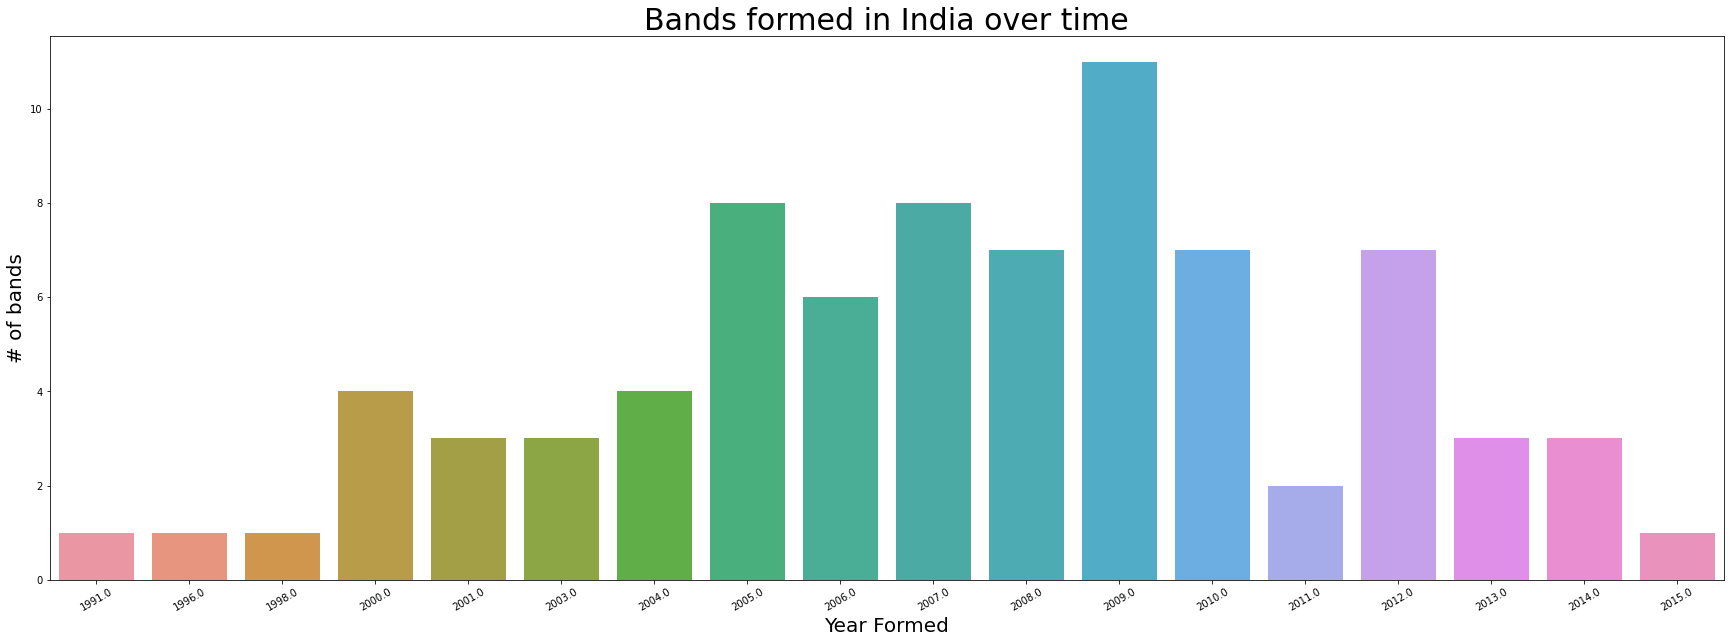

In [36]:

plt.figure(figsize = (30, 10))
indian_bands = bands.loc[bands.country == 'India', ['name', 'formed_in', 'country']]
india_band_count = indian_bands.groupby('formed_in').agg({"formed_in": {'count'}}).reset_index()
india_band_count.columns = ['_'.join(col) for col in india_band_count.columns]
ax = sns.barplot(x = 'formed_in_', y = 'formed_in_count', data = india_band_count)
_ = ax.set_xticklabels(india_band_count.formed_in_, rotation = 30)
ax.set_xlabel('Year Formed', fontdict = label_font_dict)
ax.set_ylabel("# of bands", fontdict = label_font_dict)
ax.set_title("Bands formed in India over time", fontdict = title_font_dict)

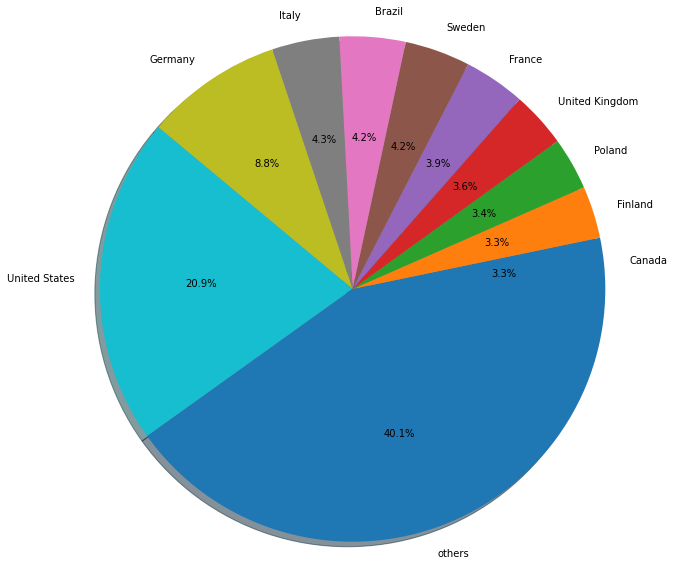

In [37]:
all_country = bands.groupby('country').count()['id'].sort_values()
country_dom = all_country.tail(10)
country_dom['others'] = all_country.sum() - country_dom.sum()
plt.figure(figsize = (10, 10))
_ = plt.pie(x = country_dom.values, labels = country_dom.index,autopct='%1.1f%%', shadow=True)
_= plt.axis('equal')

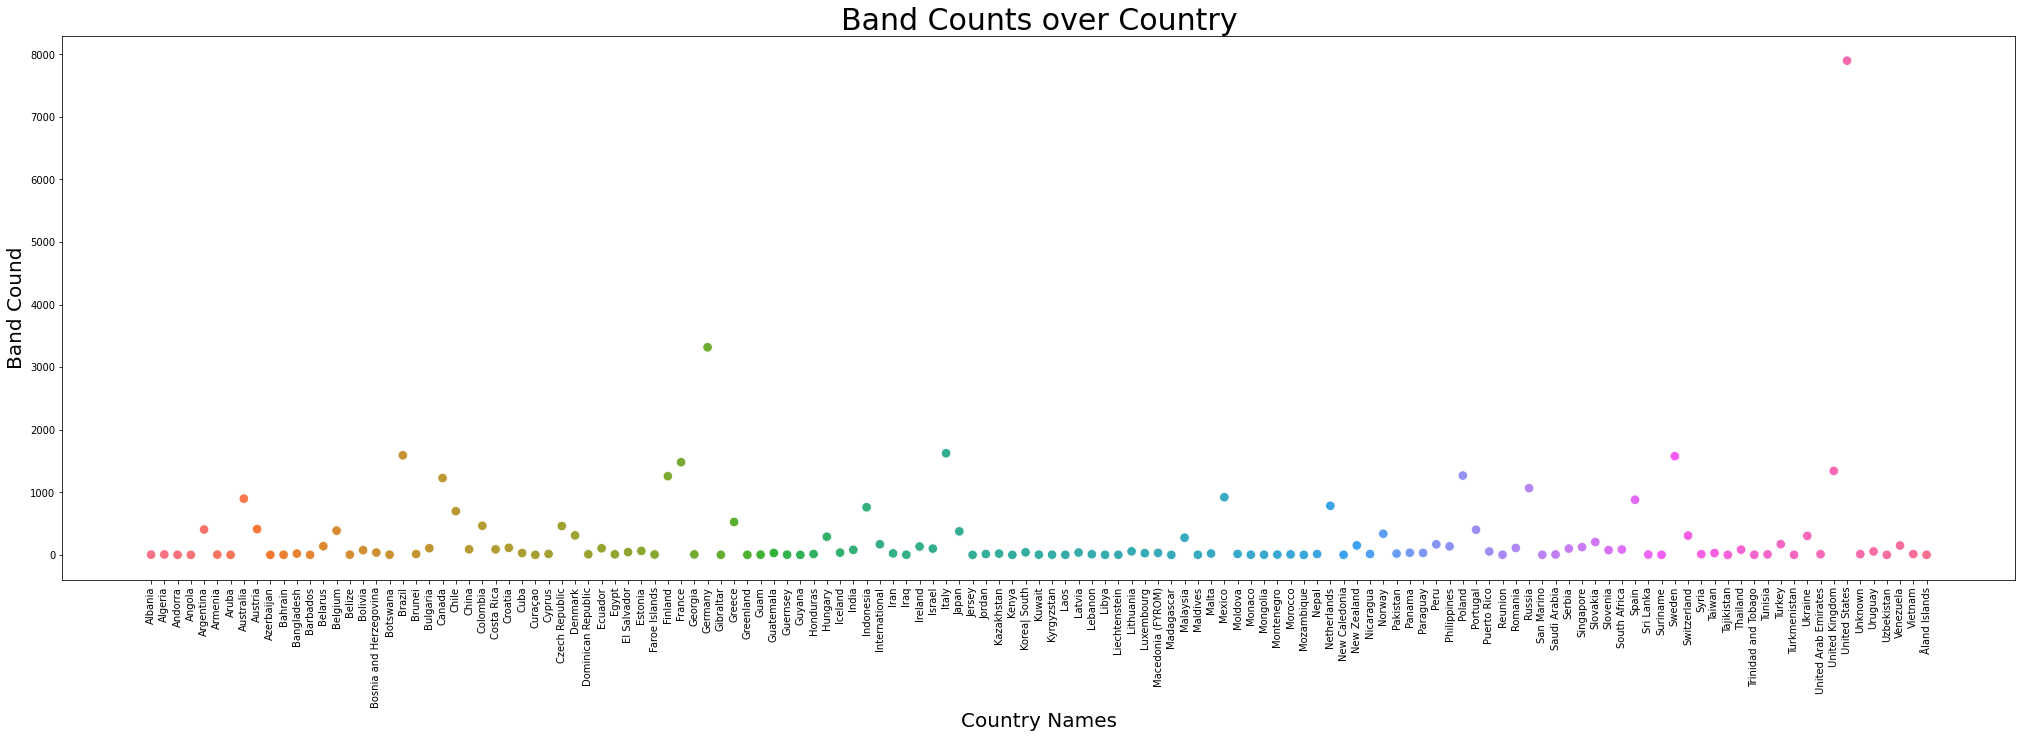

In [38]:
plt.figure(figsize = (35, 10))
ax = sns.scatterplot(x = 'country_', y = 'country_count', data = country_wise, hue = 'country_', s = 90)
ax.set_xticklabels(country_wise.loc[:, 'country_'], rotation = (90), fontsize = 10, va='top', ha='center',)
ax.set_xlabel('Country Names', fontsize = 20)
ax.set_ylabel("Band Cound", fontsize = 20)
ax.set_title("Band Counts over Country", fontsize = 30)
ax.legend().remove()

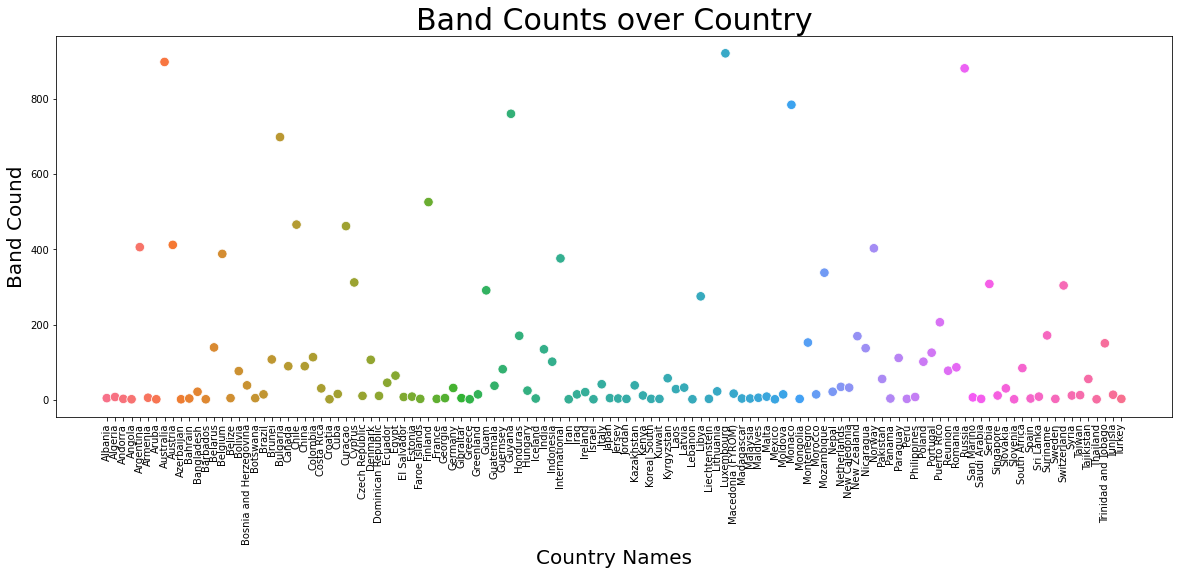

In [39]:
plt.figure(figsize = (20, 7))
country_wise1 = country_wise[country_wise.country_count < 1000]

ax = sns.scatterplot(x = 'country_', y = 'country_count', data = country_wise1, hue = 'country_', s = 90)
ax.set_xticklabels(country_wise.loc[:, 'country_'], rotation = 90, fontsize = 10)

ax.set_xlabel('Country Names', fontsize = 20)
ax.set_ylabel("Band Cound", fontsize = 20)
ax.set_title("Band Counts over Country", fontsize = 30)
ax.legend().remove()

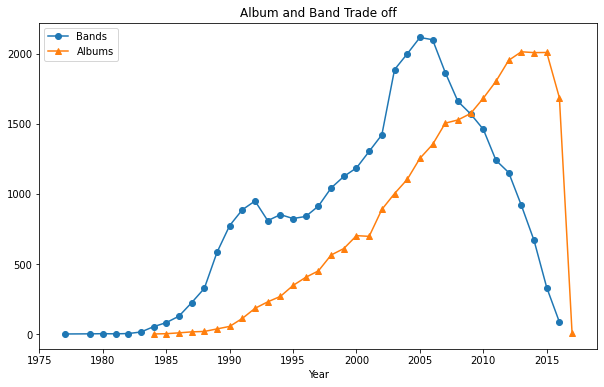

In [43]:
album_year = albums.groupby('year').agg({"year": {"count"}}).reset_index()
album_year.columns = [''.join(col) for col in album_year.columns]
band_year = bands.groupby("formed_in").agg({"formed_in": {"count"}}).reset_index()
band_year.columns = [''.join(col) for col in band_year.columns]
plt.figure(figsize = (10, 6))
plt.plot(band_year.formed_in, band_year.formed_incount, '-o')
plt.plot(album_year.year, album_year.yearcount, '-^')
plt.xlabel("Year")
plt.title("Album and Band Trade off")
plt.legend(['Bands', 'Albums'])

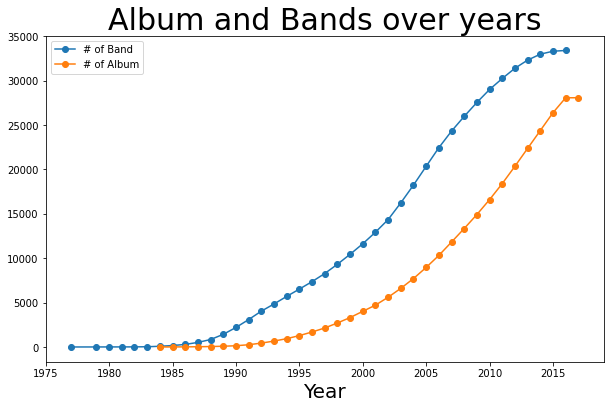

In [45]:
band_count = bands.groupby('formed_in')['id'].count().cumsum()
album_count = albums.groupby('year')['id'].count().cumsum()

fig = plt.figure(figsize = (10, 6))

band_count.plot(marker = 'o')
ax = album_count.plot(marker = 'o')
ax.set_xlabel("Year", fontdict = label_font_dict)
ax.legend(['# of Band', '# of Album'], loc = 'best')
_ = ax.set_title("Album and Bands over years", fontdict = title_font_dict)